# Introduction
Let's explore different Exponential Smoothing methods, which include:

*     Simple Exponential Smoothing (SES)
*     Holt’s Linear Trend Model (Double Exponential Smoothing)
*     Holt-Winters’ Seasonal Method (Triple Exponential Smoothing)

We will implement these models and evaluate their performance using the RMSPE metric.
End-to-End Implementation of Different Exponential Smoothing Methods

**NOTE: we will use store number 4 as an example**

# Import needed libraries

In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [102]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# load and prepare the data 

In [131]:
train = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
store = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')

In [132]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [133]:
# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])

In [134]:
# Set Date as the index
train.set_index('Date', inplace=True)

In [135]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day

In [136]:
train.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
dtype: int64

In [137]:
# Filter data for store number 4
store_4_data = train[train['Store'] == 4]

In [138]:
# Sort data by date
store_4_data.sort_index(inplace=True)

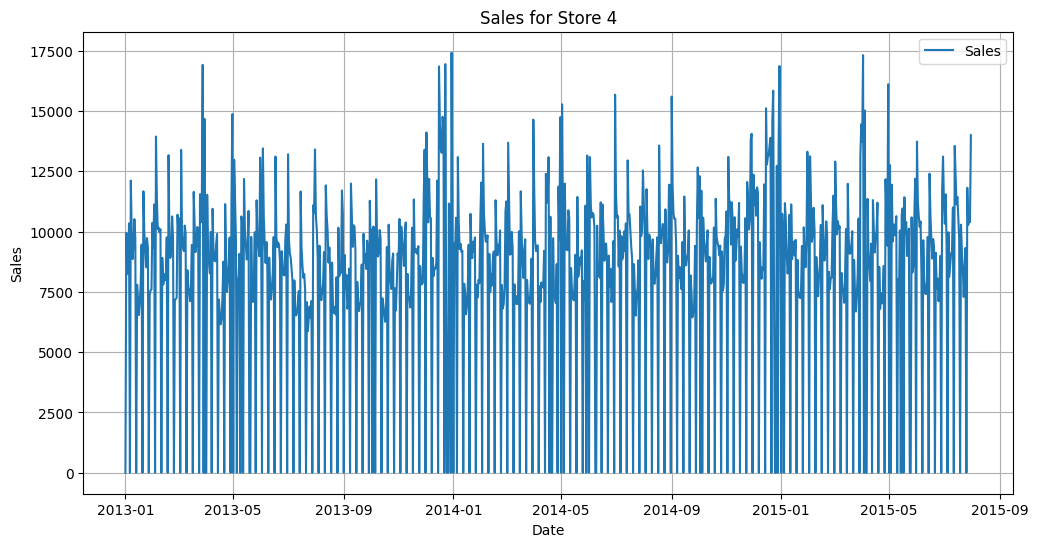

In [139]:
# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(store_4_data['Sales'], label='Sales')
plt.title('Sales for Store 4')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Train-Test Split

In [140]:
train_size = int(len(store_4_data) * 0.8)
train, test = store_4_data.iloc[:train_size], store_4_data.iloc[train_size:]

print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')

Train size: 753
Test size: 189


# Helper function to calculate RMSPE

In [151]:
def rmspe(y_true, y_pred):
    mask = y_true != 0
    return np.sqrt(np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask])))

# Models 

# Simple Exponential Smoothing (SES)

In [152]:
ses_model = SimpleExpSmoothing(train['Sales'])
ses_fit = ses_model.fit()
ses_forecast = ses_fit.forecast(steps=len(test))

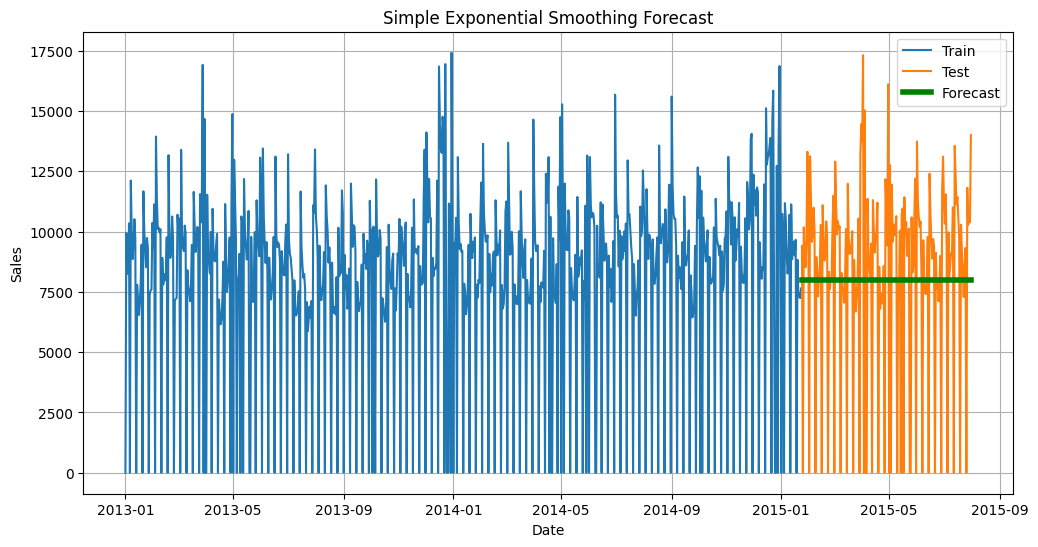

In [153]:
# Plot SES results
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(ses_forecast, label='Forecast', color='green', linewidth=4) 
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
ses_rmspe = rmspe(test['Sales'], ses_forecast)
print(f'SES RMSPE: {ses_rmspe}')

SES RMSPE: 0.2231039177797753


# Double Exponential Smoothing

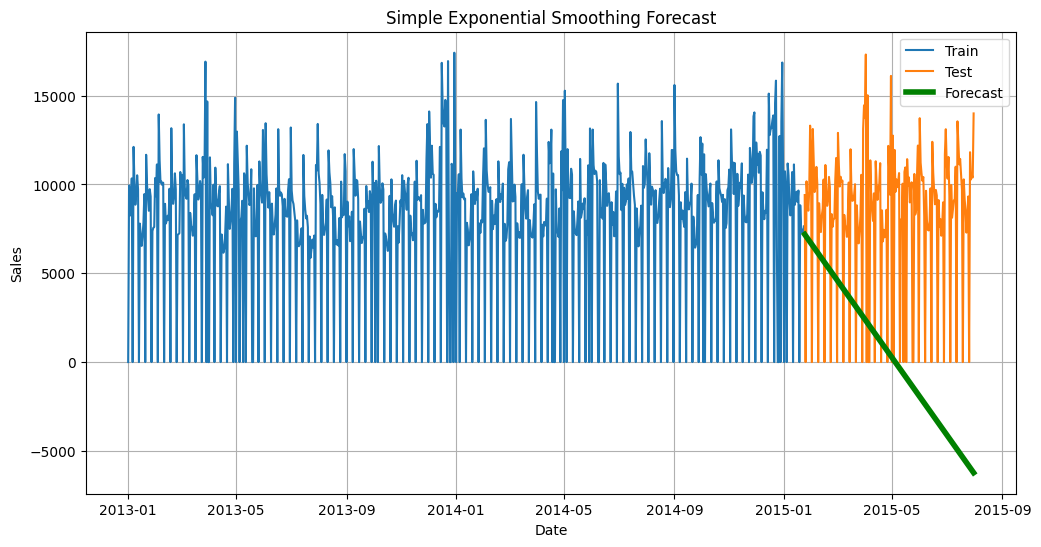

Holt’s Linear Trend RMSPE: 1.0350027424121617


In [155]:
# Fit the Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(train['Sales'], trend='add')
holt_fit = holt_model.fit()

# Make forecasts
holt_forecast = holt_fit.forecast(len(test))

# Plot Holt results
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(holt_forecast, label='Forecast', color='green', linewidth=4) 
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Holt’s Linear Trend
holt_rmspe = rmspe(test['Sales'], holt_forecast)
print(f'Holt’s Linear Trend RMSPE: {holt_rmspe}')

# Holt-Winters’ Seasonal Method (Triple Exponential Smoothing)

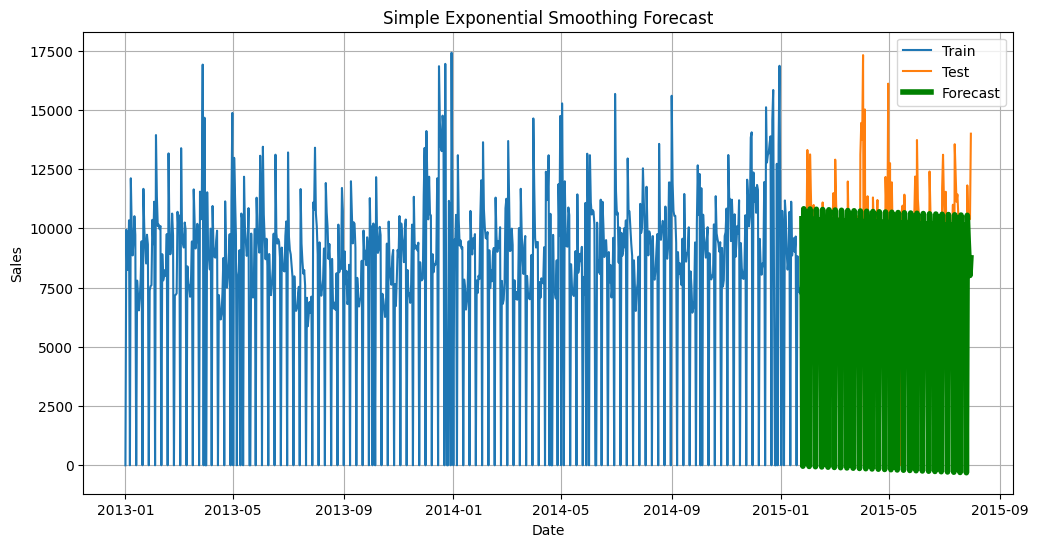

Holt-Winters’ Seasonal Method RMSPE: 0.16976619608363624


In [156]:
hw_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=7)  
hw_fit = hw_model.fit()

# Make forecasts
hw_forecast = hw_fit.forecast(len(test))

# Plot Holt-Winters’ Seasonal results
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(hw_forecast, label='Forecast', color='green', linewidth=4) 
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Holt-Winters’ Seasonal Method
hw_rmspe = rmspe(test['Sales'], hw_forecast)
print(f'Holt-Winters’ Seasonal Method RMSPE: {hw_rmspe}')

# Conclusion

| Method                    | RMSPE                |
|---------------------------|----------------------|
| <span style="background-color:#ffff99;">Holt-Winters’ Seasonal</span>    | <span style="background-color:#ffff99;">0.16976619608363624</span> |
| Holt’s Linear Trend       | 1.0350027424121617  |
| SES                       | 0.2231039177797753  |

